<a href="https://colab.research.google.com/github/libeiyang/2.5D-Resnet-Unet-for-fibula-segmentation/blob/main/segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GPU configuration

In [ ]:
!pip uninstall -y tensorflow

!pip install tensorflow-gpu==1.14

Found existing installation: tensorflow 2.6.0
Uninstalling tensorflow-2.6.0:
  Successfully uninstalled tensorflow-2.6.0
     |████████████████████████████████| 377.1 MB 7.8 kB/s 
     |████████████████████████████████| 488 kB 46.0 MB/s 
     |████████████████████████████████| 3.1 MB 52.1 MB/s 
     |████████████████████████████████| 50 kB 9.7 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.6.0
    Uninstalling tensorflow-estimator-2.6.0:
      Successfully uninstalled tensorflow-estimator-2.6.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.6.0
    Uninstalling tensorboard-2.6.0:
      Successfully uninstalled tensorboard-2.6.0


In [ ]:
import tensorflow as tf
print(tf.__version__)
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or 

1.14.0
Found GPU at: /device:GPU:0


In [ ]:
!pip uninstall -y tensorflow

In [ ]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 8521613321781595907, name: "/device:XLA_CPU:0"
 device_type: "XLA_CPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 1172618366757629692
 physical_device_desc: "device: XLA_CPU device", name: "/device:XLA_GPU:0"
 device_type: "XLA_GPU"
 memory_limit: 17179869184
 locality {
 }
 incarnation: 14013348640194453660
 physical_device_desc: "device: XLA_GPU device", name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 15964005991
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 18420331186029934385
 physical_device_desc: "device: 0, name: Tesla P100-PCIE-16GB, pci bus id: 0000:00:04.0, compute capability: 6.0"]

In [ ]:
!/opt/bin/nvidia-smi

Mon Oct 18 08:43:39 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P0    32W / 250W |    257MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# pip install and import

In [ ]:
!pip install pydicom
!pip install dicom2nifti
!pip install nibabel
!pip install niwidgets
!pip install itkwidgets
!pip install SimpleITK
!pip install opencv-python
import pydicom
import pylab
import numpy as np
import struct
import matplotlib.pyplot as plt
import dicom2nifti
import nibabel as nib
import cv2
#import niwidgets
from nibabel.viewers import OrthoSlicer3D

     |████████████████████████████████| 2.0 MB 8.2 MB/s 
  Created wheel for dicom2nifti: filename=dicom2nifti-2.3.0-py3-none-any.whl size=42932 sha256=16de67a83fc3b66cf923e46da101a0e0c66931096b6762b36aacd4c3226d0964
  Stored in directory: /root/.cache/pip/wheels/bf/ff/aa/f5b52fd2e9f9355a28a6f6f6994d721a13209387528b146db5
Successfully built dicom2nifti
     |████████████████████████████████| 12.5 MB 6.7 MB/s 
     |████████████████████████████████| 2.3 MB 53.3 MB/s 
     |████████████████████████████████| 2.9 MB 73.2 MB/s 
     |████████████████████████████████| 3.3 MB 60.2 MB/s 
     |████████████████████████████████| 5.4 MB 32.3 MB/s 
     |████████████████████████████████| 3.4 MB 69.2 MB/s 
     |████████████████████████████████| 260 kB 75.5 MB/s 
     |████████████████████████████████| 17.3 MB 48.1 MB/s 
     |████████████████████████████████| 275 kB 94.2 MB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfu

     |████████████████████████████████| 3.4 MB 8.0 MB/s 
     |████████████████████████████████| 70.6 MB 3.8 kB/s 
     |████████████████████████████████| 2.9 MB 52.5 MB/s 
     |████████████████████████████████| 861 kB 55.8 MB/s 
     |████████████████████████████████| 80 kB 11.7 MB/s 
     |████████████████████████████████| 95.3 MB 21 kB/s 
     |████████████████████████████████| 54.5 MB 11 kB/s 
     |████████████████████████████████| 48.4 MB 9.8 kB/s 


In [ ]:
#temporary
#!pip install jupyterlab
#!jupyter labextension install @jupyter-widgets/jupyterlab-manager itk-jupyter-widgets
import pydicom
import pylab
import numpy as np
import struct
import matplotlib.pyplot as plt
import dicom2nifti
import nibabel as nib
import cv2
import math
#import niwidgets
from nibabel.viewers import OrthoSlicer3D

In [ ]:
from google.colab import drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
#install a Python Library in Google Drive permanently
# import os, sys
# nb_path = '/content/notebooks'
# os.symlink('/content/drive/MyDrive/Colab Notebooks', nb_path)
# sys.path.insert(0, nb_path)  # or append(nb_path)
!pip install opencv-python

In [ ]:
#!pip install --target=$nb_path pydicom
#!pip install --target=$nb_path dicom2nifti
#!pip install --target=$nb_path nibabel
#!pip install --target=$nb_path niwidgets
#!pip install --target=$nb_path itkwidgets
!pip install SimpleITK

# Try to read dataset from Google drive

In [ ]:
##read dcm file
ds = pydicom.read_file('/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 01/test01_DTR0700.dcm')
##
pixel_bytes = ds.PixelData

##CT值组成了一个矩阵
pix = ds.pixel_array

##读取显示图片
pylab.imshow(ds.pixel_array, cmap=pylab.cm.bone)
pylab.show()

FileNotFoundError: ignored

In [ ]:
max = np.max(bmp)
max

255

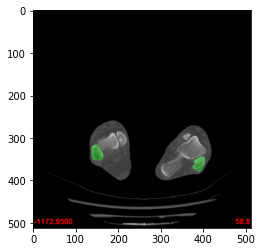

In [ ]:
##read bmp file
bmp_filepath = '/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 08 bmp/_Axial+0058.8-000.bmp'
bmp = plt.imread(bmp_filepath)
plt.imshow(bmp)
plt.show()
pos = np.unravel_index(np.argmax(bmp),bmp.shape)

In [ ]:
whos

Variable        Type           Data/Info
----------------------------------------
OrthoSlicer3D   type           <class 'nibabel.viewers.OrthoSlicer3D'>
bmp             ndarray        512x512x3: 786432 elems, type `uint8`, 786432 bytes (768.0 kb)
bmp_filepath    str            /content/drive/MyDrive/Th<...>/fibuladata01/test 01 bmp
bmp_files       list           n=983
bmp_image       ndarray        512x512x3: 786432 elems, type `uint8`, 786432 bytes (768.0 kb)
dicom2nifti     module         <module 'dicom2nifti' fro<...>dicom2nifti/__init__.py'>
dim             tuple          n=1
drive           module         <module 'google.colab.dri<...>s/google/colab/drive.py'>
ds              FileDataset    Dataset.file_meta -------<...> Array of 524288 elements
file            str            DEPRAETERE TOM ROGER_Axial+0589.2-000.bmp
height          int            512
i               int            1
img_nii         Nifti1Image    <class 'nibabel.nifti1.Ni<...>nmagic           : b'n+1'
itkwidgets 

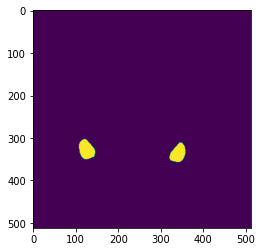

In [ ]:
label = np.zeros([512,512])
width = np.size(bmp,0)
height = np.size(bmp,1)

##used for green label
for x in range(width):
    for y in range(height):
        if bmp[x,y,0] < bmp[x,y,1]:
            label[x,y] = 1
plt.imshow(label)
plt.show()

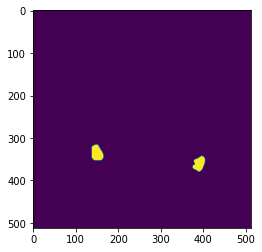

In [ ]:
#used for yellow label
src=cv2.imread(bmp_filepath)
hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
low_hsv = np.array([10,10,0])
high_hsv = np.array([360,255,255])
mask = cv2.inRange(hsv,lowerb=low_hsv,upperb=high_hsv)
plt.imshow(mask)
plt.show()

In [ ]:
#.nii格式的图像转化numpy格式
# import nibabel as nib
# import os
# import numpy as np

# img_path = '/home/lei/train/img/'
# seg_path = '/home/lei/train/seg/'
# saveimg_path = '/home/lei/train/npy_img/'
# saveseg_path = '/home/lei/train/npy_seg/'

# img_names = os.listdir(img_path)
# seg_names = os.listdir(seg_path)


# for img_name in img_names:
#     print(img_name)
#     img = nib.load(img_path + img_name).get_data() #载入
#     img = np.array(img)
#     np.save(saveimg_path + str(img_name).split('.')[0] + '.npy', img) #保存


# for seg_name in seg_names:
#     print(seg_name)
#     seg = nib.load(seg_path + seg_name).get_data()
#     seg = np.array(seg)
#     np.save(saveseg_path + str(seg_name).split('.')[0] + '.npy’, seg)

# Convert Multiple DICOM files to 3D NII files

In [ ]:
#just run once!!!!!
original_dicom_directory = '/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 06'
# named test01
output_file = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train06'
dicom2nifti.dicom_series_to_nifti(original_dicom_directory, output_file, reorient_nifti=True)

{'MAX_SLICE_INCREMENT': 0.6000000000000002,
 'NII': <nibabel.nifti1.Nifti1Image at 0x7f8bf5ed9dd0>,
 'NII_FILE': '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train06'}

In [ ]:
import SimpleITK as sitk
mask = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/seg06.npy')
mask = mask.astype(np.int)
mask = sitk.GetImageFromArray(mask)
sitk.WriteImage(mask, '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/nii/mask06.nii')

In [ ]:
max = np.max(mask)
max

KeyboardInterrupt: ignored

# try visualizaiton

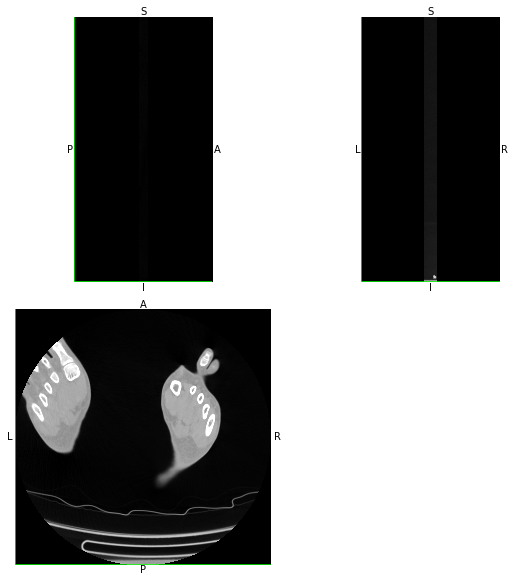

In [ ]:

from itkwidgets import view
from nibabel.viewers import OrthoSlicer3D
import itkwidgets
import nibabel as nib
output_file = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/train01.nii'
img_nii = nib.load(output_file)
# img = img_nii.get_data()
# viewer = view(img,cmap=itkwidgets.cm.grayscale)
# viewer
#img = nib.load(output_file)
OrthoSlicer3D(img_nii.dataobj).show()

# from niwidgets import NiftiWidget
# test01_img = NiftiWidget(output_file)
# test01_img.nifti_plotter()

In [ ]:
img_nii

we don't need to visualize in the jupyter, just use ITK-SNAP to visulize the nii file

# Data preprocessing

1. Convert Multiple DICOM files to 3D NII files

In [ ]:
for i in [x for x in range(12,17) if (x != 13)]:
  original_dicom_directory = '/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)
  #named train0i
  output_file = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/nii/train0'+str(i)
  dicom2nifti.dicom_series_to_nifti(original_dicom_directory, output_file, reorient_nifti=True)

%whos


In [ ]:
for i in [x for x in range(7,10)]:
  original_dicom_directory = '/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)
  #named train0i
  output_file = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/nii/train0'+str(i)
  dicom2nifti.dicom_series_to_nifti(original_dicom_directory, output_file, reorient_nifti=True)



In [ ]:
#run only once
for i in range(3,4):
  original_dicom_directory = '/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)+' bmp'
  #named train0i_seg
  output_file = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/train0'+str(i)
  dicom2nifti.dicom_series_to_nifti(original_dicom_directory, output_file, reorient_nifti=True)

IndexError: ignored

In [ ]:
##read bmp file
##transfer label bmp to npy file

##run only once!!!!!!!!!!!!!!!!!!!!!!!!
import os
for i in [x for x in range(10,21) if (x != 12 or x != 14 or x !=15 or x != 16)]:
  bmp_filepath = '/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)+' bmp'
  bmp_files = os.listdir(bmp_filepath)
  num_file = len(bmp_files)
  seg_data = np.zeros((0,512,512))
  for file in bmp_files:
    #traverse all files
    bmp_image = plt.imread('/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)+' bmp/'+file)
    label = np.zeros([512,512])
    width = np.size(bmp_image,0)
    height = np.size(bmp_image,1)
    for x in range(width):
      for y in range(height):
        if bmp_image[x,y,0] < bmp_image[x,y,1]:
          label[x,y] = 255
    seg_data = np.append(seg_data, label)#先拼接成一个行向量

  seg_npy = seg_data.reshape(num_file,512,512)#recombination

  np.save('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg0'+str(i)+'.npy',seg_npy)
  


In [ ]:
##this part is used to deal with bmp yellow label
import os
for i in[x for x in range(12,15) if (x!=13)]:
  bmp_filepath = '/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)+' bmp'
  bmp_files = os.listdir(bmp_filepath)
  num_file = len(bmp_files)
  seg_data = np.zeros((0,512,512))
  for file in bmp_files:
    #traverse all files
    src=cv2.imread('/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)+' bmp/'+file)
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    low_hsv = np.array([10,10,0])
    high_hsv = np.array([60,255,255])
    mask = cv2.inRange(hsv,lowerb=low_hsv,upperb=high_hsv)
    seg_data = np.append(seg_data, mask)#先拼接成一个行
  seg_npy = seg_data.reshape(num_file,512,512)#recombination
  np.save('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/seg0'+str(i)+'.npy',seg_npy)

In [ ]:
##this part is used to deal with bmp purple label
import os
for i in[x for x in range(15,17)]:
  bmp_filepath = '/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)+' bmp'
  bmp_files = os.listdir(bmp_filepath)
  num_file = len(bmp_files)
  seg_data = np.zeros((0,512,512))
  for file in bmp_files:
    #traverse all files
    src=cv2.imread('/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)+' bmp/'+file)
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    low_hsv = np.array([10,10,0])
    high_hsv = np.array([330,255,255])
    mask = cv2.inRange(hsv,lowerb=low_hsv,upperb=high_hsv)
    seg_data = np.append(seg_data, mask)#先拼接成一个行
  seg_npy = seg_data.reshape(num_file,512,512)#recombination
  np.save('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/seg0'+str(i)+'.npy',seg_npy)

In [ ]:
##this part is used to deal with bmp green label for 7,8,9
##new for 3
import os
for i in[x for x in range(3,4)]:
  bmp_filepath = '/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)+' bmp'
  bmp_files = os.listdir(bmp_filepath)
  num_file = len(bmp_files)
  seg_data = np.zeros((0,512,512))
  for file in bmp_files:
    #traverse all files
    src=cv2.imread('/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)+' bmp/'+file)
    hsv = cv2.cvtColor(src, cv2.COLOR_BGR2HSV)
    low_hsv = np.array([10,10,0])
    high_hsv = np.array([360,255,255])
    mask = cv2.inRange(hsv,lowerb=low_hsv,upperb=high_hsv)
    seg_data = np.append(seg_data, mask)#先拼接成一个行
  seg_npy = seg_data.reshape(num_file,512,512)#recombination
  np.save('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/seg0'+str(i)+'.npy',seg_npy)

In [ ]:
##run only once!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
##nii to npy
import os

img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/nii/'

saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'

img_names = os.listdir(img_path)
for i in [x for x in range(12,17) if (x != 13)]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/nii/train0'+str(i)+'.nii'
  img = nib.load(img_filepath).get_data() 
  img = np.array(img)
  np.save(saveimg_path + 'train0'+str(i) + '.npy', img) 



In [ ]:
##nii to npy
import os

img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/nii/'

saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'

img_names = os.listdir(img_path)
for i in [x for x in range(7,10)]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/nii/train0'+str(i)+'.nii'
  img = nib.load(img_filepath).get_data() 
  img = np.array(img)
  np.save(saveimg_path + 'train0'+str(i) + '.npy', img) 


In [ ]:
#just for try
# import os
# seg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/'
# try1 = np.load(seg_path+'seg06.npy')
# try1.shape
# plt.imshow(try1[500,:,:])
# plt.show()
# for i in [x for x in range(1,7) if x != 2]:
#   print(i)
#%whos

img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
img = np.load(img_path+'img_zxy0'+str(4)+'.npy')
plt.imshow(img[600])
plt.show()


KeyboardInterrupt: ignored

In [ ]:
#used as reference
# import os
# img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img01.npy'
# img_before = np.load(img_filepath)
# img_before = img_before.transpose(2,1,0)
# plt.imshow(img_before[600][::-1])
# plt.show()
# del training_img 
# del training_img_int
# del training_seg
# del training_seg_int
# pos = np.unravel_index(np.argmax(img[300]),img[300].shape)
# pos
max = np.max(img[600])
max

2060.0

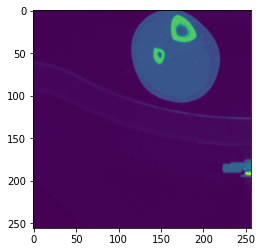

In [ ]:
training_seg = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint020.npz')['img_crop']
seg_test = training_seg[15][0]
plt.imshow(seg_test)
plt.show()

In [ ]:
plt.imshow(training_img[])

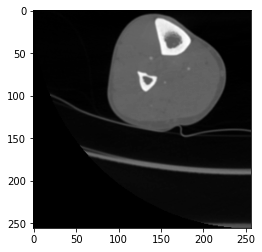

In [ ]:
training_img = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint.npz')['img_crop']
img_test = training_img[8][1]

plt.imshow(img_test,cmap='gray')
plt.show()


In [ ]:
max = np.max(training_img)
max

254

In [ ]:
#just run once!!!!!!!!!!
#this is used for transfer the img file from xyz to zxy
import os
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
for i in range(10,12):
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/train0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  
  img_before = img_before.transpose(2,1,0)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))

  for n in range(0,img_before.shape[0]):
    img[n] = img_before[n][::-1]
    
  np.save(saveimg_path + 'img_zxy0' + str(i) + '.npy', img) 
for i in range(13,14):
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/train0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  
  img_before = img_before.transpose(2,1,0)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))

  for n in range(0,img_before.shape[0]):
    img[n] = img_before[n][::-1]
    
  np.save(saveimg_path + 'img_zxy0' + str(i) + '.npy', img) 
for i in range(17,21):
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/train0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  
  img_before = img_before.transpose(2,1,0)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))

  for n in range(0,img_before.shape[0]):
    img[n] = img_before[n][::-1]
    
  np.save(saveimg_path + 'img_zxy0' + str(i) + '.npy', img) 

In [ ]:
#this is used for transfer the img file from xyz to zxy
import os
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
for i in [x for x in range(12,17) if (x != 13)]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/train0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  
  img_before = img_before.transpose(2,1,0)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))

  for n in range(0,img_before.shape[0]):
    img[n] = img_before[n][::-1]
    
  np.save(saveimg_path + 'img_zxy0' + str(i) + '.npy', img) 

In [ ]:
#this is used for transfer the img file from xyz to zxy
import os
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
for i in [x for x in range(1,7) if (x!=2)]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/train0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  
  img_before = img_before.transpose(2,1,0)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))

  for n in range(0,img_before.shape[0]):
    img[n] = img_before[n][::-1]
    
  np.save(saveimg_path + 'img_zxy0' + str(i) + '.npy', img) 

In [ ]:
#this is used for transfer the img file from xyz to zxy
import os
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
for i in [x for x in range(7,10)]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/train0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  
  img_before = img_before.transpose(2,1,0)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))

  for n in range(0,img_before.shape[0]):
    img[n] = img_before[n][::-1]
    
  np.save(saveimg_path + 'img_zxy0' + str(i) + '.npy', img) 

In [ ]:
#just run once!!!!!!!!!!
#this is used for transfer the img file from 4095 to 255 in order to use uint
import os
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
max = 255
for i in range(10,12):
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))
  for n in range(0,z_num):
    img[n] = (img_before[n]/4095)*255
  img = img.astype(np.uint8)
  np.save(saveimg_path + 'img_zxy_uint0' + str(i) + '.npy', img) 
for i in range(13,14):
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))
  for n in range(0,z_num):
    img[n] = (img_before[n]/4095)*255
  img = img.astype(np.uint8)
  np.save(saveimg_path + 'img_zxy_uint0' + str(i) + '.npy', img)
for i in range(17,21):
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))
  for n in range(0,z_num):
    img[n] = (img_before[n]/4095)*255
  img = img.astype(np.uint8)
  np.save(saveimg_path + 'img_zxy_uint0' + str(i) + '.npy', img)


# training_img_int = training_img.astype(np.uint8)
# training_seg_int = training_img.astype(np.uint8)

In [ ]:
#this is used for transfer the img file from 4095 to 255 in order to use uint
import os
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
for i in [x for x in range(12,14) if (x != 13)]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))
  for n in range(0,z_num):
    img[n] = (img_before[n]/4095)*255
  img = img.astype(np.uint8)
  np.save(saveimg_path + 'img_zxy_uint0' + str(i) + '.npy', img)

In [ ]:
#this is used for transfer the img file from 4095 to 255 in order to use uint
#because the min of 14,15,16 is -1024, so these need to an extra transfer
import os
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
for i in [x for x in range(14,17)]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))
  for n in range(0,z_num):
    img[n] = ((img_before[n]+1024)/4095)*255
  img = img.astype(np.uint8)
  np.save(saveimg_path + 'img_zxy_uint0' + str(i) + '.npy', img)

In [ ]:
#this is used for transfer the img file from 4095 to 255 in order to use uint
#because the min of 17 is -1024, so these need to an extra transfer
import os
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
for i in [x for x in range(17,18)]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))
  for n in range(0,z_num):
    img[n] = ((img_before[n]+1024)/4095)*255
  img = img.astype(np.uint8)
  np.save(saveimg_path + 'img_zxy_uint0' + str(i) + '.npy', img)

In [ ]:
#this is used for transfer the img file from 4095 to 255 in order to use uint
import os
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
for i in [x for x in range(7,10)]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))
  for n in range(0,z_num):
    img[n] = (img_before[n]/4095)*255
  img = img.astype(np.uint8)
  np.save(saveimg_path + 'img_zxy_uint0' + str(i) + '.npy', img)

In [ ]:
#this is used for transfer the img file from 4095 to 255 in order to use uint
import os
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
for i in [x for x in range(1,7) if (x != 2)]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy0'+str(i)+'.npy'
  img_before = np.load(img_filepath)
  z_num = img_before.shape[0]
  img = np.zeros((z_num,512,512))
  for n in range(0,z_num):
    img[n] = (img_before[n]/4095)*255
  img = img.astype(np.uint8)
  np.save(saveimg_path + 'img_zxy_uint0' + str(i) + '.npy', img)

In [ ]:
##because the No.15 has 1543 slides which is too large. We crop the last 350 slides which are useless
img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy_uint020.npy'
img_before = np.load(img_filepath)
#x[:2,-2:]
#img_before = img_before[:1200,:,:]

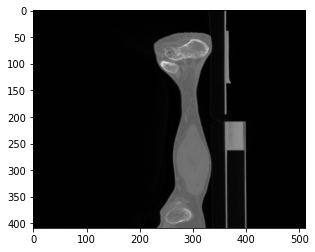

In [ ]:
img_test = img_before[:,:,210]
min = np.min(img_before)
plt.imshow(img_test,cmap='gray')
plt.show()


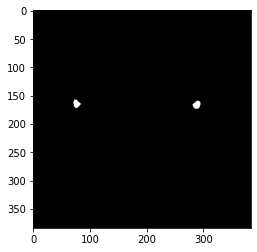

In [ ]:
#have a look at the uint img
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/seg020.npy'
seg = np.load(saveimg_path).astype(np.uint8)
plt.imshow(crop_img_axial(seg)[300],cmap='gray')
plt.show()

In [ ]:
test = crop_img_axial(seg)[300]

In [ ]:
%whos

Variable         Type                  Data/Info
------------------------------------------------
OrthoSlicer3D    type                  <class 'nibabel.viewers.OrthoSlicer3D'>
crop_img_axial   function              <function crop_img_axial at 0x7f4bf0191a70>
cv2              module                <module 'cv2.cv2' from '/<...>37m-x86_64-linux-gnu.so'>
device_lib       module                <module 'tensorflow.pytho<...>on/client/device_lib.py'>
device_name      str                   /device:GPU:0
dicom2nifti      module                <module 'dicom2nifti' fro<...>dicom2nifti/__init__.py'>
drive            module                <module 'google.colab.dri<...>s/google/colab/drive.py'>
math             module                <module 'math' (built-in)>
nib              module                <module 'nibabel' from '/<...>ges/nibabel/__init__.py'>
np               module                <module 'numpy' from '/us<...>kages/numpy/__init__.py'>
plt              module                <module 'mat

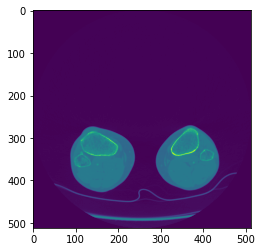

In [ ]:
#compare to the float64 img, we can see that there is no difference, so it is successful.
saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
img = np.load(saveimg_path+'img_zxy03.npy')
plt.imshow(img[600])
plt.show()

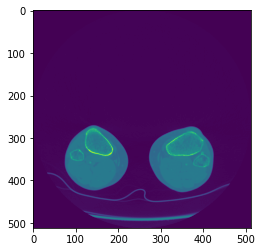

In [ ]:
plt.imshow(cv2.flip(img[600], 1))
#we can use cv2.flip(img,1) to get the mirror img

# Axial dataset preprocessing

In axial, we don't need to crop the data in the z axial. Each slide is useful for the segmentation training for axial.



In [ ]:
def crop_img_axial(img):#384*384,先竖再横
    startx = 128
    starty = 64
    endy = 512-64

    return img[:,-384:,starty:endy]#512*256*512

In [ ]:
import os
import numpy as np
img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
seg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/'
img_01_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy_uint01.npy'
img_all = np.load(img_01_path)

for i in [x for x in range(2,21) if x != 2]:
  img_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/img_zxy_uint0'+str(i)+'.npy'
  img_one = np.load(img_filepath)
  img_all = np.append(img_all,img_one,axis=0)

img_all = crop_img_axial(img_all)

In [ ]:
import os
import numpy as np
img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
seg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/'
seg_01_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/seg01.npy'
seg_all = np.load(seg_01_path).astype(np.uint8)

for i in [x for x in range(2,21) if x != 2]:
  seg_filepath = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/seg0'+str(i)+'.npy'
  seg_one = np.load(seg_filepath).astype(np.uint8)
  seg_all = np.append(seg_all,seg_one,axis=0)

seg_all = crop_img_axial(seg_all)

In [ ]:
%whos

In [ ]:
np.savez('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/full_axial_uint020.npz', img = img_all, seg = seg_all)   

In [ ]:
np.savez('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_axial_uint020.npz', img = img_all, seg = seg_all)   

In [ ]:
import os
import numpy as np
img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
seg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/'


# This part is used to cut from the middle for z,x,y
# def crop_img_center(img,cropx,cropy,cropz):#img is z*x*y
#     z,x,y = img.shape
#     startx = x//2-(cropx//2)
#     starty = y//2-(cropy//2)
#     startz = z//2-(cropz//2)

#     return img[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]

# def crop_seg_center(seg,cropx,cropy,cropz):#seg is z*x*y
#     z,x,y = seg.shape
#     startx = x//2-(cropx//2)# // means devide round down
#     starty = y//2-(cropy//2)#350 for small one 
#     startz = z//2-(cropz//2)

#     return seg[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]#700*256*500


# This part is used to cut from the middle for z,y
# x is cut from end
def crop_img_center(img,cropx,cropy,cropz):#img is z*x*y
    z,x,y = img.shape
    if(z<cropz):
      img = np.pad(img,((int((cropz-z)/2),math.ceil((cropz-z)/2)),(0,0),(0,0)), 'constant', constant_values = 0)
      #np.pad(a, ((0, 1), (0, 0)), 'constant', constant_values=0)
      #1、向下取整： int()
      #2、向上取整：math.ceil()
    z,x,y = img.shape
    print(z)
    startx = 0
    starty = y//2
    startz = z//2-(cropz//2)

    return img[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]

def crop_seg_center(seg,cropx,cropy,cropz):#seg is z*x*y
    z,x,y = seg.shape
    if(z<cropz):
      seg = np.pad(seg,((int((cropz-z)/2),math.ceil((cropz-z)/2)),(0,0),(0,0)), 'constant', constant_values = 0)
    z,x,y = seg.shape
    startx = 0
    starty = y//2#350 for small one 
    startz = z//2-(cropz//2)

    return seg[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]#512*256*512

def crop_img_center_formirror(img,cropx,cropy,cropz):#img is z*x*y
    z,x,y = img.shape
    if(z<cropz):
      img = np.pad(img,((int((cropz-z)/2),math.ceil((cropz-z)/2)),(0,0),(0,0)), 'constant', constant_values = 0)
    z,x,y = img.shape
    startx = x//2
    starty = y//2
    startz = z//2-(cropz//2)

    return img[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]

def crop_seg_center_formirror(seg,cropx,cropy,cropz):#seg is z*x*y
    z,x,y = seg.shape
    if(z<cropz):
      seg = np.pad(seg,((int((cropz-z)/2),math.ceil((cropz-z)/2)),(0,0),(0,0)), 'constant', constant_values = 0)
    z,x,y = seg.shape
    startx = x//2
    starty = y//2#350 for small one 
    startz = z//2-(cropz//2)

    return seg[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]



In [ ]:
import os
import numpy as np
img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
seg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/'

# usual 5,512,256,512
# we use 10*512*256*16 for mirror
img_crop_arr = np.zeros((6,500,256,256))
seg_crop_arr = np.zeros((6,500,256,256))

n = 0
 
for i in [x for x in range(10,14) if x != 12]:
#for i in [x for x in range(18,21)]:

    img = np.load(img_path+'img_zxy_uint0'+str(i)+'.npy')
    seg = np.load(seg_path+'seg0'+str(i)+'.npy')
    img_crop = crop_img_center(img,256,256,500)
    seg_crop = crop_seg_center(seg,256,256,500)
    img_crop_arr[n] = img_crop
    seg_crop_arr[n] = seg_crop
    n+=1
for i in [x for x in range(10,14) if x != 12]:
#for i in [x for x in range(18,21)]:
    img = np.load(img_path+'img_zxy_uint0'+str(i)+'.npy')
    seg = np.load(seg_path+'seg0'+str(i)+'.npy')
    img_crop = crop_img_center_formirror(img,256,256,500)
    seg_crop = crop_seg_center_formirror(seg,256,256,500)
    #mirror  cv2.flip(img,1)
    for i in range(500):
      img_crop[i] = cv2.flip(img_crop[i],1)
      seg_crop[i] = cv2.flip(seg_crop[i],1)
    img_crop_arr[n] = img_crop
    seg_crop_arr[n] = seg_crop
    n+=1
    

training_img_int = img_crop_arr.astype(np.uint8)
training_seg_int = seg_crop_arr.astype(np.uint8)
np.savez('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint1014.npz', img_crop = training_img_int, seg_crop = training_seg_int)    


#transfer to int for saving RAM

In [ ]:
import os
import numpy as np
img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
seg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/'

img_crop_arr = np.zeros((6,500,256,256))
seg_crop_arr = np.zeros((6,500,256,256))

n = 0
 
#for i in [x for x in range(10,14) if x != 12]:
for i in [x for x in range(18,21)]:

    img = np.load(img_path+'img_zxy_uint0'+str(i)+'.npy')
    seg = np.load(seg_path+'seg0'+str(i)+'.npy')
    img_crop = crop_img_center(img,256,256,500)
    seg_crop = crop_seg_center(seg,256,256,500)
    img_crop_arr[n] = img_crop
    seg_crop_arr[n] = seg_crop
    n+=1
    print(n)
#for i in [x for x in range(10,14) if x != 12]:
for i in [x for x in range(18,21)]:
    img = np.load(img_path+'img_zxy_uint0'+str(i)+'.npy')
    seg = np.load(seg_path+'seg0'+str(i)+'.npy')
    img_crop = crop_img_center_formirror(img,256,256,500)
    seg_crop = crop_seg_center_formirror(seg,256,256,500)
    #mirror  cv2.flip(img,1)
    for i in range(500):
      img_crop[i] = cv2.flip(img_crop[i],1)
      seg_crop[i] = cv2.flip(seg_crop[i],1)
    img_crop_arr[n] = img_crop
    seg_crop_arr[n] = seg_crop
    n+=1
    

training_img_int = img_crop_arr.astype(np.uint8)
training_seg_int = seg_crop_arr.astype(np.uint8)
np.savez('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint1821.npz', img_crop = training_img_int, seg_crop = training_seg_int)    


797
1
774
2
500
3


In [ ]:
import os
import numpy as np
img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
seg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/'


img_crop_arr = np.zeros((4,500,256,256))
seg_crop_arr = np.zeros((4,500,256,256))

n = 0
 
for i in [x for x in range(1,4) if x != 2]:
#for i in [x for x in range(18,21)]:

    img = np.load(img_path+'img_zxy_uint0'+str(i)+'.npy')
    seg = np.load(seg_path+'seg0'+str(i)+'.npy')
    img_crop = crop_img_center(img,256,256,500)
    seg_crop = crop_seg_center(seg,256,256,500)
    img_crop_arr[n] = img_crop
    seg_crop_arr[n] = seg_crop
    n+=1
for i in [x for x in range(1,4) if x != 2]:
#for i in [x for x in range(18,21)]:
    img = np.load(img_path+'img_zxy_uint0'+str(i)+'.npy')
    seg = np.load(seg_path+'seg0'+str(i)+'.npy')
    img_crop = crop_img_center_formirror(img,256,256,500)
    seg_crop = crop_seg_center_formirror(seg,256,256,500)
    #mirror  cv2.flip(img,1)
    for i in range(500):
      img_crop[i] = cv2.flip(img_crop[i],1)
      seg_crop[i] = cv2.flip(seg_crop[i],1)
    img_crop_arr[n] = img_crop
    seg_crop_arr[n] = seg_crop
    n+=1
    

training_img_int = img_crop_arr.astype(np.uint8)
training_seg_int = seg_crop_arr.astype(np.uint8)
np.savez('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint0103.npz', img_crop = training_img_int, seg_crop = training_seg_int)    


983
734


In [ ]:
import os
import numpy as np
img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
seg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/'


img_crop_arr = np.zeros((6,500,256,256))
seg_crop_arr = np.zeros((6,500,256,256))

n = 0
 
for i in [x for x in range(4,7) if x != 2]:
#for i in [x for x in range(18,21)]:

    img = np.load(img_path+'img_zxy_uint0'+str(i)+'.npy')
    seg = np.load(seg_path+'seg0'+str(i)+'.npy')
    img_crop = crop_img_center(img,256,256,500)
    seg_crop = crop_seg_center(seg,256,256,500)
    img_crop_arr[n] = img_crop
    seg_crop_arr[n] = seg_crop
    n+=1
for i in [x for x in range(4,7) if x != 2]:
#for i in [x for x in range(18,21)]:
    img = np.load(img_path+'img_zxy_uint0'+str(i)+'.npy')
    seg = np.load(seg_path+'seg0'+str(i)+'.npy')
    img_crop = crop_img_center_formirror(img,256,256,500)
    seg_crop = crop_seg_center_formirror(seg,256,256,500)
    #mirror  cv2.flip(img,1)
    for i in range(500):
      img_crop[i] = cv2.flip(img_crop[i],1)
      seg_crop[i] = cv2.flip(seg_crop[i],1)
    img_crop_arr[n] = img_crop
    seg_crop_arr[n] = seg_crop
    n+=1
    

training_img_int = img_crop_arr.astype(np.uint8)
training_seg_int = seg_crop_arr.astype(np.uint8)
np.savez('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint0406.npz', img_crop = training_img_int, seg_crop = training_seg_int)    


670
790
786


In [ ]:

a1 = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint0103.npz')['img_crop']
a2 = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint0406.npz')['img_crop']
b1 = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint1014.npz')['img_crop']

b2 = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint1821.npz')['img_crop']

c = np.append(a1,a2,axis=0)
c = np.append(c,b1,axis=0)
c = np.append(c,b2,axis=0)

x1 = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint0103.npz')['seg_crop']
x2 = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint0406.npz')['seg_crop']
y1 = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint1014.npz')['seg_crop']

y2 = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint1821.npz')['seg_crop'] 

z = np.append(x1,x2,axis=0)
z = np.append(z,y1,axis=0)
z = np.append(z,y2,axis=0)
np.savez('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint020.npz', img_crop = c, seg_crop = z)   

In [ ]:
a = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint.npz')['img_crop']
b1 = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint1014.npz')['img_crop']
b2 = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint1821.npz')['img_crop']
c = np.append(a,b1,axis=0)
c = np.append(c,b2,axis=0)

In [ ]:
img_test829 = np.load(img_path+'img_zxy_uint020.npy')

In [ ]:
%whos

Variable                    Type                  Data/Info
-----------------------------------------------------------
OrthoSlicer3D               type                  <class 'nibabel.viewers.OrthoSlicer3D'>
crop_img_center             function              <function crop_img_center at 0x7f68e0e0c830>
crop_img_center_formirror   function              <function crop_img_center<...>mirror at 0x7f68e0e0c320>
crop_seg_center             function              <function crop_seg_center at 0x7f68e0e0c290>
crop_seg_center_formirror   function              <function crop_seg_center<...>mirror at 0x7f68e0e0c680>
cv2                         module                <module 'cv2.cv2' from '/<...>37m-x86_64-linux-gnu.so'>
device_lib                  module                <module 'tensorflow.pytho<...>on/client/device_lib.py'>
device_name                 str                   /device:GPU:0
dicom2nifti                 module                <module 'dicom2nifti' fro<...>dicom2nifti/__init__.py'>
drive 

# V net model utils

In [ ]:
from __future__ import print_function
import numpy as np
import os


# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior() #for use placeholder
import tensorflow as tf

def conv_3d_pool(x,name,filter_num,filter_size,strides):
	with tf.compat.v1.variable_scope(name):
		input_channel = x.get_shape()[4]
		W = tf.get_variable("weights",[filter_size[0],filter_size[1],filter_size[2],
							input_channel,filter_num],
							initializer=tf.random_normal_initializer(stddev=0.02))
		b = tf.get_variable("bias",[filter_num],initializer=tf.constant_initializer(0.0))
		conv = tf.nn.conv3d(x,W,strides=[1,strides[0],strides[1],strides[2],1],padding='SAME')
		return tf.nn.relu(conv+b)

def conv_3d(x,name,filter_num,filter_size):
	with tf.compat.v1.variable_scope(name):
		input_channel = x.get_shape()[4]
		W = tf.get_variable("weights",[filter_size[0],filter_size[1],filter_size[2],
							input_channel,filter_num],
							initializer=tf.random_normal_initializer(stddev=0.02))
		b = tf.get_variable("bias",[filter_num],initializer=tf.constant_initializer(0.0))
		conv = tf.nn.conv3d(x,W,strides=[1,1,1,1,1],padding='SAME')
		return tf.nn.relu(conv+b)

def conv_3d_linear(x,name,filter_num,filter_size):
	with tf.compat.v1.variable_scope(name):
		input_channel = x.get_shape()[4]
		W = tf.get_variable("weights",[filter_size[0],filter_size[1],filter_size[2],
							input_channel,filter_num],
							initializer=tf.random_normal_initializer(stddev=0.02))
		b = tf.get_variable("bias",[filter_num],initializer=tf.constant_initializer(0.0))
		conv = tf.nn.conv3d(x,W,strides=[1,1,1,1,1],padding='SAME')
		return (conv+b)

def residual_block(x,name,filter_size):
	with tf.compat.v1.variable_scope(name):
		filter_num = x.get_shape()[4]
		conv_1 = conv_3d(x,"conv_1",filter_num,filter_size)
		conv_2 = conv_3d_linear(conv_1,"conv_2",filter_num,filter_size)
		return tf.nn.relu(tf.add(x,conv_2))

def residual_block_3(x,name,filter_size):
	with tf.compat.v1.variable_scope(name):
		filter_num = x.get_shape()[4]
		conv_1 = conv_3d(x,"conv_1",filter_num,filter_size)
		conv_2 = conv_3d(conv_1,"conv_2",filter_num,filter_size)
		conv_3 = conv_3d_linear(conv_2,"conv_3",filter_num,filter_size)
		return tf.nn.relu(tf.add(x,conv_3))

def up_residual_block(x,y,name,filter_size):
	with tf.compat.v1.variable_scope(name):
		filter_num = x.get_shape()[4]
		xy = tf.concat([x,y],axis=4)
		conv_1 = conv_3d(xy,"conv_1",filter_num,filter_size)
		conv_2 = conv_3d_linear(conv_1,"conv_2",filter_num,filter_size)
		return tf.nn.relu(tf.add(x,conv_2))

def up_residual_block_3(x,y,name,filter_size):
	with tf.compat.v1.variable_scope(name):
		filter_num = x.get_shape()[4]
		xy = tf.concat([x,y],axis=4)
		conv_1 = conv_3d(xy,"conv_1",filter_num,filter_size)
		conv_2 = conv_3d(conv_1,"conv_2",filter_num,filter_size)
		conv_3 = conv_3d_linear(conv_2,"conv_3",filter_num,filter_size)
		return tf.nn.relu(tf.add(x,conv_3))

def conv_3d_sigmoid(x,name,filter_num,filter_size):
	with tf.compat.v1.variable_scope(name):
		input_channel = x.get_shape()[4]
		W = tf.get_variable("weights",[filter_size[0],filter_size[1],filter_size[2],
							input_channel,filter_num],
							initializer=tf.random_normal_initializer(stddev=0.02))
		b = tf.get_variable("bias",[filter_num],initializer=tf.constant_initializer(0.0))
		conv = tf.nn.conv3d(x,W,strides=[1,1,1,1,1],padding='SAME')
		return tf.sigmoid(conv+b)

def deconv_3d(x,name,filter_num,filter_size,strides):
	with tf.compat.v1.variable_scope(name):
		x_shape = x.get_shape().as_list()
		input_channel = x_shape[4]
		output_shape = [x_shape[0],x_shape[1]*strides[0],x_shape[2]*strides[1],
						x_shape[3]*strides[2],filter_num]
		W = tf.get_variable("weights",[filter_size[0],filter_size[1],filter_size[2],
							filter_num,input_channel],
							initializer=tf.random_normal_initializer(stddev=0.02))
		b = tf.get_variable("bias",[filter_num],initializer=tf.constant_initializer(0.0))
		conv = tf.nn.conv3d_transpose(x,W,output_shape=output_shape,strides=[1,strides[0],strides[1],strides[2],1],padding='SAME')
		return tf.nn.relu(conv+b)

def get_v_net(x,name="u_net",b=1):
	with tf.compat.v1.variable_scope(name):
		conv1 = conv_3d(x,"conv1_1",b*16,[3,3,3])
		conv1 = conv_3d(conv1,"conv1_2",b*16,[3,3,3])
		pool1 = conv_3d_pool(conv1,"pool1",b*32,[3,3,3],[2,2,2])

		conv2 = residual_block(pool1,"conv2_1",[3,3,3])
		pool2 = conv_3d_pool(conv2,"pool2",b*64,[3,3,3],[2,2,2])

		conv3 = residual_block_3(pool2,"conv3_1",[3,3,3])
		pool3 = conv_3d_pool(conv3,"pool3",b*128,[3,3,3],[2,2,2])

		conv4 = residual_block_3(pool3,"conv4_1",[3,3,3])

		up5 = deconv_3d(conv4,"deconv5",b*64,(2,2,2),(2,2,2))
		conv5 = up_residual_block_3(up5,conv3,"conv5_1",[3,3,3])

		up6 = deconv_3d(conv5,"deconv6",b*32,(2,2,2),(2,2,2))
		conv6 = up_residual_block(up6,conv2,"conv6_1",[3,3,3])

		up7 = deconv_3d(conv6,"deconv7",b*16,(2,2,2),(2,2,2))
		conv7 = up_residual_block(up7,conv1,"conv7_1",[3,3,3])

		#conv8 = conv_3d_linear(conv7,"conv8",2,[1,1,1])
		conv8 = conv_3d_sigmoid(conv7,"conv8",1,[1,1,1])
		return conv8

'''def dice_loss(conv_out,y,name="dice_loss"):
	with tf.variable_scope(name):
		y_true = tf.contrib.layers.flatten(tf.cast(y, tf.float32))
		y_pred = tf.contrib.layers.flatten(conv_out)
		intersection = tf.reduce_sum(y_true * y_pred,1)
		#dc = (2. * intersection + 0.01) / (tf.reduce_sum(y_true,1) + tf.reduce_sum(y_pred,1) + 0.01)
		dc = (2. * intersection + 0.01) / (tf.reduce_sum(y_true*y_true,1) + tf.reduce_sum(y_pred*y_pred,1) + 0.01)
		dc_mean = tf.reduce_mean(dc)
		dc_loss = -dc_mean
		return dc_loss'''
def dice_loss(y1,y2):
	y_true = tf.contrib.layers.flatten(y2)
	y_pred = tf.contrib.layers.flatten(y1)
	intersection = tf.reduce_sum(y_true * y_pred,1)
	#dc = (2. * intersection + 0.01) / (tf.reduce_sum(y_true*y_true,1) + tf.reduce_sum(y_pred*y_pred,1) + 0.01)
	dc = (2. * intersection + 0.01) / (tf.reduce_sum(y_true,1) + tf.reduce_sum(y_pred,1) + 0.01)
	dc_loss = - tf.reduce_mean(dc)
	#dc_loss = tf.exp(dc_loss)
	return dc_loss

def dice(y1,y2):
	y_true = tf.contrib.layers.flatten(y2)
	y_pred = (tf.sign(tf.contrib.layers.flatten(y1) - 0.5) + 1)/2.0
	intersection = tf.reduce_sum(y_true * y_pred,1)
	dc = (2. * intersection + 0.01) / (tf.reduce_sum(y_true,1) + tf.reduce_sum(y_pred,1) + 0.01)
	dc_coef = tf.reduce_mean(dc)
	return dc_coef

def get_train_op(loss,lr=0.0001):
	optimizer =  tf.train.AdamOptimizer(lr)
	train_op = optimizer.minimize(loss)
	return train_op

'''
TODO:
Weighted cross entropy loss
Learning rate decay
'''

def weighted_softmax_loss(y_true, y_pred_linear, pos_weight):
	y_true_one_hot = tf.one_hot(y_true, depth=2)
	flat_y_true = tf.reshape(y_true_one_hot, [-1, 2])
	flat_y_pred = tf.reshape(y_pred_linear, [-1, 2])
	weights = tf.constant(np.array([1.0, pos_weight], dtype=np.float32))
	case_weights = tf.reduce_sum(tf.multiply(flat_y_true, weights),axis=1)
	loss = tf.nn.softmax_cross_entropy_with_logits(labels=flat_y_true,logits=flat_y_pred)
	ave_loss = tf.reduce_mean(tf.multiply(loss, case_weights))
	return ave_loss

def pred_prob(y_pred_linear):
	return (tf.nn.softmax(y_pred_linear))[:,:,:,:,1]


# Train network

In [ ]:
#temporary use


Interactive namespace is empty.


In [ ]:
from __future__ import print_function
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0"
import numpy as np
#from scipy.ndimage import rotate
#import scipy.ndimage
#from scipy import ndimage
#from random import randint
import os
#import SimpleITK as sitk
#from V_net_utils import get_v_net, dice_loss, dice

# import tensorflow.compat.v1 as tf
# tf.disable_v2_behavior() #for use placeholder

import tensorflow as tf
tf.compat.v1.disable_eager_execution()

def check_make_file(file):
	if not os.path.exists(file):
		os.makedirs(file)

print("Build network")
#np.zeros((5,256,512,512))
img_x = 256
img_y = 256
img_z = 16
bs = 5

tf.compat.v1.reset_default_graph()
x = tf.compat.v1.placeholder(tf.float32,[bs,img_z,img_x,img_y,1])
y = tf.compat.v1.placeholder(tf.float32,[bs,img_z,img_x,img_y,1])
y_pred = get_v_net(x)
loss = dice_loss(y_pred,y)
dc_mean = dice(y_pred,y)
optimizer = tf.train.AdamOptimizer(0.0002)
train_op = optimizer.minimize(loss)
init = tf.global_variables_initializer()

training_img = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint020.npz')['img_crop']
training_seg = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint020.npz')['seg_crop']

training_img = np.multiply(training_img, 1.0/255.0)


#test_images = np.multiply(test_images, 1.0 / 255.0)

training_img = training_img[:,:,:,:,np.newaxis]
training_seg = training_seg[:,:,:,:,np.newaxis]#22 16 256 256 1

sess = tf.Session()
sess.run(init)
step = 0
echo = 43
print ("begin to train")
saver = tf.train.Saver(max_to_keep=500)

while step <= echo:
	for kk in range(training_img.shape[0]//bs):
		a,b = sess.run([loss,train_op], feed_dict={x: training_img[kk*bs:bs*(kk+1),:,:,:,:],
						y: training_seg[kk*bs:bs*(kk+1),:,:,:,:]})
    #saver.save
		print('step {} loss {}'.format(step,a))
	step = step+1
saver = tf.train.Saver()
model_path = "/content/drive/MyDrive/ThesisProject/"
save_path = saver.save(sess, model_path)



# img part data preprocessing

In [ ]:
#dicom to nii
for i in range(10,21):
  original_dicom_directory = '/content/drive/MyDrive/ThesisProject/dataset/fibuladata01/test 0'+str(i)
  #named train0i
  output_file = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/train0'+str(i)
  dicom2nifti.dicom_series_to_nifti(original_dicom_directory, output_file, reorient_nifti=True)
#finished

In [ ]:
#nii to npy
import os

img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/nii/'

saveimg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'

img_names = os.listdir(img_path)
 
for img_name in img_names:
    print(img_name)
    img = nib.load(img_path + img_name).get_data() 
    img = np.array(img)
    np.save(saveimg_path + str(img_name).split('.')[0] + '.npy', img) 
#finished

In [ ]:
#4095 to 255 to uint


In [ ]:
#xyz to zxy

# seg part data preprocessing

In [ ]:
min = np.max(training_seg)
min

255

# V net evaluate

In [ ]:
import os
import numpy as np
img_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/img_npy/'
seg_path = '/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/seg_npy/'


# This part is used to cut from the middle for z,x,y
# def crop_img_center(img,cropx,cropy,cropz):#img is z*x*y
#     z,x,y = img.shape
#     startx = x//2-(cropx//2)
#     starty = y//2-(cropy//2)
#     startz = z//2-(cropz//2)

#     return img[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]

# def crop_seg_center(seg,cropx,cropy,cropz):#seg is z*x*y
#     z,x,y = seg.shape
#     startx = x//2-(cropx//2)# // means devide round down
#     starty = y//2-(cropy//2)#350 for small one 
#     startz = z//2-(cropz//2)

#     return seg[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]#700*256*500


# This part is used to cut from the middle for z,y
# x is cut from end
def crop_img_center(img,cropx,cropy,cropz):#img is z*x*y
    z,x,y = img.shape
    startx = x//2
    starty = y//2-(cropy//2)
    startz = z//2-(cropz//2)

    return img[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]

def crop_seg_center(seg,cropx,cropy,cropz):#seg is z*x*y
    z,x,y = seg.shape
    startx = x//2
    starty = y//2-(cropy//2)#350 for small one 
    startz = z//2-(cropz//2)

    return seg[startz:startz+cropz,starty:starty+cropy,startx:startx+cropx]#512*256*512

# usual 5,512,256,512
# we use 5*512*256*16
img_crop_arr = np.zeros((5,16,512,256))
seg_crop_arr = np.zeros((5,16,512,256))

n = 0
 
for i in [x for x in range(1,7) if x != 2]:

    img = np.load(img_path+'img_zxy_uint0'+str(i)+'.npy')
    seg = np.load(seg_path+'seg0'+str(i)+'.npy')
    img_crop = crop_img_center(img,256,512,16)
    seg_crop = crop_seg_center(seg,256,512,16)
    img_crop_arr[n] = img_crop
    seg_crop_arr[n] = seg_crop
    n+=1
training_img_int = img_crop_arr.astype(np.uint8)
training_seg_int = seg_crop_arr.astype(np.uint8)
np.savez('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/evaluate_set/npz/crop_test_equal_half_test_uint.npz', img_crop = training_img_int, seg_crop = training_seg_int)    


#transfer to int for saving RAM

In [ ]:
ls {checkpoint_dir}

ls: cannot access '{checkpoint_dir}': No such file or directory


In [ ]:
from __future__ import print_function
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0"
import numpy as np
#from scipy.ndimage import rotate
#import scipy.ndimage
#from scipy import ndimage
#from random import randint
#import os
#import SimpleITK as sitk
import tensorflow as tf

img_x = 256
img_y = 256
img_z = 16
bs = 5
tf.compat.v1.reset_default_graph()
x = tf.placeholder(tf.float32,[bs,img_z,img_x,img_y,1])
y = tf.placeholder(tf.float32,[bs,img_z,img_x,img_y,1])
y_pred = get_v_net(x)

# for train
# training_img = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_half_test_uint.npz')['img_crop']
# training_seg = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_half_test_uint.npz')['seg_crop']
testing_img = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_half_test_uint.npz')['img_crop']
testing_seg = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_half_test_uint020.npz')['seg_crop']
training_img = np.multiply(training_img, 1.0/255.0)
testing_img = testing_img[:,:,:,:,np.newaxis]
testing_seg = testing_seg[:,:,:,:,np.newaxis]
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
saver_vnet = tf.train.Saver(max_to_keep=500)
#saver_vnet.restore(sess,'/content/drive/MyDrive/ThesisProject/dataset/leg_nii/model/leg_model-100')
seg_result = np.zeros((10,16,512,256,1))
for kk in range(testing_img.shape[0]//bs):
	seg_result[kk] = sess.run(y_pred,feed_dict={x: testing_img[kk*bs:bs*(kk+1),:,:,:,:],
							  y: testing_seg[kk*bs:bs*(kk+1),:,:,:,:]})
np.save('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/model/V_net_evaluate.npy', seg_result)


In [ ]:
#try to predict

img_x = 256
img_y = 256
img_z = 16
bs = 5
tf.compat.v1.reset_default_graph()
x = tf.placeholder(tf.float32,[bs,img_z,img_x,img_y,1])
y = tf.placeholder(tf.float32,[bs,img_z,img_x,img_y,1])
y_pred = get_v_net(x)
testing_img = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint.npz')['img_crop']
testing_seg = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint.npz')['seg_crop']
testing_img = testing_img[:,:,:,:,np.newaxis]
testing_seg = testing_seg[:,:,:,:,np.newaxis]
checkpoint_dir = '/content/'
ckpt = tf.train.get_checkpoint_state(checkpoint_dir)
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)
saver = tf.train.Saver()
#saver.restore(sess,ckpt.model_checkpoint_path)
seg_result = np.zeros((10,16,256,256,1))
for kk in range(testing_img.shape[0]//bs):  
  seg_result[kk] = sess.run(y_pred, feed_dict={x: testing_img[kk*bs:bs*(kk+1),:,:,:,:]})
np.save('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/model/V_net_evaluate020.npy', seg_result)

ValueError: ignored

In [ ]:
from __future__ import print_function
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="0"
import numpy as np
#from scipy.ndimage import rotate
#import scipy.ndimage
#from scipy import ndimage
#from random import randint
#import os
#import SimpleITK as sitk
import tensorflow as tf

img_x = 256
img_y = 256
img_z = 16
bs = 1
tf.compat.v1.reset_default_graph()
x = tf.placeholder(tf.float32,[bs,img_z,img_x,img_y,1])
y = tf.placeholder(tf.float32,[bs,img_z,img_x,img_y,1])
y_pred = get_v_net(x)

# for train
# training_img = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_half_test_uint.npz')['img_crop']
# training_seg = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_half_test_uint.npz')['seg_crop']
testing_img = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint.npz')['img_crop']
testing_seg = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_halfmirror_test_uint.npz')['seg_crop']
testing_img = testing_img[:,:,:,:,np.newaxis]
testing_seg = testing_seg[:,:,:,:,np.newaxis]
init = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init)
saver_vnet = tf.train.Saver(max_to_keep=500)
#saver_vnet.restore(sess,'/content/drive/MyDrive/ThesisProject/.meta')
seg_result = np.zeros((10,16,256,256,1))
for kk in range(testing_img.shape[0]//bs):
	seg_result[kk] = sess.run(y_pred,feed_dict={x: testing_img[kk*bs:bs*(kk+1),:,:,:,:]})
np.save('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/model/V_net_evaluate.npy', seg_result)

# extract

In [ ]:
seg_result = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/model/V_net_evaluate.npy')
seg_result3D = np.zeros((10,16,256,256))
for i in range(10):
  seg_result3D[i] = seg_result[i][:,:,:,0]

  

In [ ]:
%whos

In [ ]:
seg_result_final = np.zeros((10,16,256,256))
shape1 = np.shape(seg_result3D)
shape1

(10, 16, 256, 256)

In [ ]:

# for a in range(5):
#   for i in range(16):
#     for j in range(512):
#       for z in range(256):
#         if seg_result3D[a][i][j][z]>0.5:
#           seg_result_final[a][i][j][z] = 1

seg_result3D[seg_result3D>=0.50] = 1
seg_result3D[seg_result3D<0.50] = 0

In [ ]:
pos = np.unravel_index(np.argmax(seg_result3D[3]),seg_result3D[3].shape)
pos

(0, 0, 35)

In [ ]:
max111 = np.max(seg_result3D[5])
max111

1.0

In [ ]:
seg_result3D[3][1][300][120]

IndexError: ignored

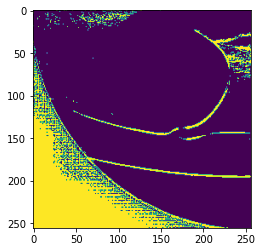

In [ ]:
plt.imshow(seg_result3D[8][1])
plt.show()

In [ ]:
import SimpleITK as sitk
import numpy as np
def nii_save(img,path):
	sitk_img = sitk.GetImageFromArray(np.transpose(img[:,:,:,np.newaxis],(0,1,2,3)), isVector=True)
	sitk.WriteImage(sitk_img,path)

# for i in range(kk.shape[0]):
#     nii_save(kk[i],'/content/drive/MyDrive/ThesisProject/dataset/leg_nii/model/result/case'+str(i)+'img.nii')
#     nii_save(gg[i,:,:,:,0],'/content/drive/MyDrive/ThesisProject/dataset/leg_nii/model/result/case'+str(i)+'mask.nii')
#     nii_save(jj[i,:,:,:],'/content/drive/MyDrive/ThesisProject/dataset/leg_nii/model/result/case'+str(i)+'truth.nii')

In [ ]:
for i in range(10):
  nii_save(seg_result3D[i],'/content/drive/MyDrive/ThesisProject/dataset/leg_nii/model/result/case'+str(i)+'mask.nii')


# Sub-volume Sampling


In [ ]:
def get_sub_volume(image, label, 
                   orig_x = 512, orig_y = 512, orig_z = 512, 
                   output_x = 160, output_y = 160, output_z = 16,
                   num_classes = 4, max_tries = 1000, 
                   background_threshold=0.95):
    """
    Extract random sub-volume from original images.

    Args:
        image (np.array): original image, 
            of shape (orig_x, orig_y, orig_z, num_channels)
        label (np.array): original label. 
            labels coded using discrete values rather than
            a separate dimension, 
            so this is of shape (orig_x, orig_y, orig_z)
        orig_x (int): x_dim of input image
        orig_y (int): y_dim of input image
        orig_z (int): z_dim of input image
        output_x (int): desired x_dim of output
        output_y (int): desired y_dim of output
        output_z (int): desired z_dim of output
        num_classes (int): number of class labels
        max_tries (int): maximum trials to do when sampling
        background_threshold (float): limit on the fraction 
            of the sample which can be the background

    returns:
        X (np.array): sample of original image of dimension 
            (num_channels, output_x, output_y, output_z)
        y (np.array): labels which correspond to X, of dimension 
            (num_classes, output_x, output_y, output_z)
    """
    # Initialize features and labels with `None`
    X = None
    y = None

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    
    tries = 0
    
    while tries < max_tries:
        # randomly sample sub-volume by sampling the corner voxel
        # hint: make sure to leave enough room for the output dimensions!
        start_x = np.random.randint(orig_x - output_x + 1 )
        start_y = np.random.randint(orig_y - output_y + 1 )
        start_z = np.random.randint(orig_z - output_z + 1 )

        # extract relevant area of label
        y = label[start_x: start_x + output_x,
                  start_y: start_y + output_y,
                  start_z: start_z + output_z]
        
        # One-hot encode the categories.
        # This adds a 4th dimension, 'num_classes'
        # (output_x, output_y, output_z, num_classes)
        y = keras.utils.to_categorical(y, num_classes)

        # compute the background ratio
        bgrd_ratio = y[:,:,:, 0].sum() / (output_x * output_y * output_z)

        # increment tries counter
        tries += 1

        # if background ratio is below the desired threshold,
        # use that sub-volume.
        # otherwise continue the loop and try another random sub-volume
        if bgrd_ratio < background_threshold:

            # make copy of the sub-volume
            X = np.copy(image[start_x: start_x + output_x,
                              start_y: start_y + output_y,
                              start_z: start_z + output_z, :])
            
            # change dimension of X
            # from (x_dim, y_dim, z_dim, num_channels)
            # to (num_channels, x_dim, y_dim, z_dim)
            X = np.moveaxis(X, -1, 0)

            # change dimension of y
            # from (x_dim, y_dim, z_dim, num_classes)
            # to (num_classes, x_dim, y_dim, z_dim)
            y = np.moveaxis(y, -1, 0)

            ### END CODE HERE ###
            
            # take a subset of y that excludes the background class
            # in the 'num_classes' dimension
            y = y[1:, :, :, :]
    
            return X, y

    # if we've tried max_tries number of samples
    # Give up in order to avoid looping forever.
    print(f"Tried {tries} times to find a sub-volume. Giving up...")

In [ ]:
def single_class_dice_coefficient(y_true, y_pred, axis=(0, 1, 2), 
                                  epsilon=0.00001):
    """
    Compute dice coefficient for single class.

    Args:
        y_true (Tensorflow tensor): tensor of ground truth values for single class.
                                    shape: (x_dim, y_dim, z_dim)
        y_pred (Tensorflow tensor): tensor of predictions for single class.
                                    shape: (x_dim, y_dim, z_dim)
        axis (tuple): spatial axes to sum over when computing numerator and
                      denominator of dice coefficient.
                      Hint: pass this as the 'axis' argument to the K.sum function.
        epsilon (float): small constant added to numerator and denominator to
                        avoid divide by 0 errors.
    Returns:
        dice_coefficient (float): computed value of dice coefficient.     
    """
    
    dice_numerator = K.sum(2 * y_true * y_pred, axis= axis) + epsilon
    dice_denominator = K.sum(y_true,axis= axis) + K.sum(y_pred, axis = axis) + epsilon
    dice_coefficient = dice_numerator / dice_denominator 

    return dice_coefficient

In [ ]:
# or use soft dice loss
def soft_dice_loss(y_true, y_pred, axis=(1, 2, 3), 
                   epsilon=0.00001):
    """
    Compute mean soft dice loss over all abnormality classes.

    Args:
        y_true (Tensorflow tensor): tensor of ground truth values for all classes.
                                    shape: (num_classes, x_dim, y_dim, z_dim)
        y_pred (Tensorflow tensor): tensor of soft predictions for all classes.
                                    shape: (num_classes, x_dim, y_dim, z_dim)
        axis (tuple): spatial axes to sum over when computing numerator and
                      denominator in formula for dice loss.
                      Hint: pass this as the 'axis' argument to the K.sum
                            and K.mean functions.
        epsilon (float): small constant added to numerator and denominator to
                        avoid divide by 0 errors.
    Returns:
        dice_loss (float): computed value of dice loss.     
    """
    dice_numerator = 2 * K.sum(y_true * y_pred, axis=axis) + epsilon
    dice_denominator = K.sum(K.square(y_true), axis = axis) + K.sum(K.square(y_pred), axis = axis) + epsilon
    dice_loss = 1 - K.mean(dice_numerator / dice_denominator, axis = 0)

    return dice_loss

In [ ]:
def dice_coefficient(y_true, y_pred, axis=(1, 2, 3), 
                     epsilon=0.00001):
    """
    Compute mean dice coefficient over all abnormality classes.

    Args:
        y_true (Tensorflow tensor): tensor of ground truth values for all classes.
                                    shape: (num_classes, x_dim, y_dim, z_dim)
        y_pred (Tensorflow tensor): tensor of predictions for all classes.
                                    shape: (num_classes, x_dim, y_dim, z_dim)
        axis (tuple): spatial axes to sum over when computing numerator and
                      denominator of dice coefficient.
                      Hint: pass this as the 'axis' argument to the K.sum
                            and K.mean functions.
        epsilon (float): small constant add to numerator and denominator to
                        avoid divide by 0 errors.
    Returns:
        dice_coefficient (float): computed value of dice coefficient.     
    """  
    dice_numerator = K.sum(2 * y_true * y_pred, axis= axis) + epsilon
    dice_denominator = K.sum(y_true,axis= axis) + K.sum(y_pred, axis = axis) + epsilon
    dice_coefficient = K.mean(dice_numerator / dice_denominator,axis = 0)
    return dice_coefficient

# 3D U Net

In [ ]:
# Import the elements you'll need to build your U-Net
import keras
from keras import backend as K
from keras.engine import Input, Model
from keras.layers import Conv3D, MaxPooling3D, UpSampling3D, Activation, BatchNormalization
from keras.optimizers import Adam
from keras.layers.merge import concatenate
# Set the image shape to have the channels in the first dimension
K.set_image_data_format("channels_first")


# Define an input layer tensor of the shape you'll use in the assignment
input_layer = Input(shape=(4, 160, 160, 16))
input_layer

#Notice that the tensor shape has a ‘?’ as the very first dimension. This will be the batch size.
#So the dimensions of the tensor are: (batch_size, num_channels, height, width, length)



<KerasTensor: shape=(None, 4, 160, 160, 16) dtype=float32 (created by layer 'input_2')>

In [ ]:
# Contracting (downward) path

# Depth 0
#  Layer 0
# Define a Conv3D tensor with 32 filters
down_depth_0_layer_0 = Conv3D(filters=32,
kernel_size=(3,3,3),
padding='same',
strides=(1,1,1)
)(input_layer)
down_depth_0_layer_0


<KerasTensor: shape=(None, 32, 160, 160, 16) dtype=float32 (created by layer 'conv3d')>

In [ ]:
# Notice that with 32 filters, the result you get above is a tensor with 32 channels.
# Run the next cell to add a relu activation to the first convolutional layer

# Add a relu activation to layer 0 of depth 0
down_depth_0_layer_0 = Activation('relu')(down_depth_0_layer_0)
down_depth_0_layer_0

<KerasTensor: shape=(None, 32, 160, 160, 16) dtype=float32 (created by layer 'activation')>

In [ ]:
#  Layer 1
# Create a Conv3D layer with 64 filters and add relu activation
down_depth_0_layer_1 = Conv3D(filters=64,
kernel_size=(3,3,3),
padding='same',
strides=(1,1,1)
)(down_depth_0_layer_0)
down_depth_0_layer_1 = Activation('relu')(down_depth_0_layer_1)
down_depth_0_layer_1

<KerasTensor: shape=(None, 64, 160, 160, 16) dtype=float32 (created by layer 'activation_1')>

In [ ]:
# Define a max pooling layer
down_depth_0_layer_pool = MaxPooling3D(pool_size=(2,2,2))(down_depth_0_layer_1)
down_depth_0_layer_pool

<KerasTensor: shape=(None, 64, 80, 80, 8) dtype=float32 (created by layer 'max_pooling3d')>

In [ ]:
# Add a Conv3D layer to your network with relu activation
down_depth_1_layer_0 = Conv3D(filters=64,
kernel_size=(3,3,3),
padding='same',
strides=(1,1,1)
)(down_depth_0_layer_pool)
down_depth_1_layer_0 = Activation('relu')(down_depth_1_layer_0)
down_depth_1_layer_0

<KerasTensor: shape=(None, 64, 80, 80, 8) dtype=float32 (created by layer 'activation_2')>

In [ ]:
# Add another Conv3D with 128 filters to your network.
down_depth_1_layer_1 = Conv3D(filters=128,
kernel_size=(3,3,3),
padding='same',
strides=(1,1,1)
)(down_depth_1_layer_0)
down_depth_1_layer_1 = Activation('relu')(down_depth_1_layer_1)
down_depth_1_layer_1

<KerasTensor: shape=(None, 128, 80, 80, 8) dtype=float32 (created by layer 'activation_3')>

No max pooling at depth 1 (the bottom of the U)

In [ ]:
# Expanding (upward) Path
# Add an upsampling operation to your network
up_depth_0_layer_0 = UpSampling3D(size=(2,2,2))(down_depth_1_layer_1)
up_depth_0_layer_0

<KerasTensor: shape=(None, 128, 160, 160, 16) dtype=float32 (created by layer 'up_sampling3d')>

In [ ]:
print(up_depth_0_layer_0)
print()
print(down_depth_0_layer_1)

KerasTensor(type_spec=TensorSpec(shape=(None, 128, 160, 160, 16), dtype=tf.float32, name=None), name='up_sampling3d/concat_2:0', description="created by layer 'up_sampling3d'")

KerasTensor(type_spec=TensorSpec(shape=(None, 64, 160, 160, 16), dtype=tf.float32, name=None), name='activation_1/Relu:0', description="created by layer 'activation_1'")


In [ ]:
# Add a concatenation along axis 1
up_depth_1_concat = concatenate([up_depth_0_layer_0,
down_depth_0_layer_1],
axis=1)
up_depth_1_concat
#concatenate((a1, a2, …), axis=0)数组拼接函数 参数:a1,a2……为要拼接的数组
#axis为在哪个维度上进行拼接，默认为0
#128+64 = 192

<KerasTensor: shape=(None, 192, 160, 160, 16) dtype=float32 (created by layer 'concatenate')>

In [ ]:
# Add a Conv3D up-convolution with 64 filters to your network
up_depth_1_layer_1 = Conv3D(filters=64,
kernel_size=(3,3,3),
padding='same',
strides=(1,1,1)
)(up_depth_1_concat)
up_depth_1_layer_1 = Activation('relu')(up_depth_1_layer_1)
up_depth_1_layer_1

<KerasTensor: shape=(None, 64, 160, 160, 16) dtype=float32 (created by layer 'activation_4')>

In [ ]:
# Add a Conv3D up-convolution with 64 filters to your network
up_depth_1_layer_2 = Conv3D(filters=64,
kernel_size=(3,3,3),
padding='same',
strides=(1,1,1)
)(up_depth_1_layer_1)
up_depth_1_layer_2 = Activation('relu')(up_depth_1_layer_2)
up_depth_1_layer_2

<KerasTensor: shape=(None, 64, 160, 160, 16) dtype=float32 (created by layer 'activation_5')>

In [ ]:
# Add a final Conv3D with 3 filters to your network.
final_conv = Conv3D(filters=1, #3 categories
kernel_size=(1,1,1),
padding='valid',
strides=(1,1,1)
)(up_depth_1_layer_2)
final_conv

<KerasTensor: shape=(None, 1, 160, 160, 16) dtype=float32 (created by layer 'conv3d_6')>

In [ ]:
# Add a sigmoid activation to your final convolution.
final_activation = Activation('sigmoid')(final_conv)
final_activation

<KerasTensor: shape=(None, 1, 160, 160, 16) dtype=float32 (created by layer 'activation_6')>

In [ ]:
# Define and compile your model
model = Model(inputs=input_layer, outputs=final_activation)
model.compile(optimizer=Adam(lr=0.00001),
loss='categorical_crossentropy',
metrics=['categorical_accuracy']
)
# Print out a summary of the model you created
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 4, 160, 160, 0                                            
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 32, 160, 160, 3488        input_1[0][0]                    
__________________________________________________________________________________________________
activation (Activation)         (None, 32, 160, 160, 0           conv3d[0][0]                     
__________________________________________________________________________________________________
conv3d_1 (Conv3D)               (None, 64, 160, 160, 55360       activation[0][0]                 
______________________________________________________________________________________________

# 3D Unet util

In [ ]:
import cv2
import h5py
import imageio
import keras
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from IPython.display import Image
from keras import backend as K
from keras.engine import Input, Model
from tensorflow.keras.layers import (
    Activation,
    Conv3D,
    Conv3DTranspose,
    MaxPooling3D,
    UpSampling3D,
)
from keras.layers import Conv3D, MaxPooling3D, UpSampling3D, Activation, BatchNormalization
from keras.layers.merge import concatenate
from keras.optimizers import Adam
from keras.utils import to_categorical
from tensorflow.compat.v1.logging import INFO, set_verbosity

set_verbosity(INFO)

K.set_image_data_format("channels_first")


def plot_image_grid(image):
    data_all = []

    data_all.append(image)

    fig, ax = plt.subplots(3, 6, figsize=[16, 9])

    # coronal plane
    coronal = np.transpose(data_all, [1, 3, 2, 4, 0])
    coronal = np.rot90(coronal, 1)

    # transversal plane
    transversal = np.transpose(data_all, [2, 1, 3, 4, 0])
    transversal = np.rot90(transversal, 2)

    # sagittal plane
    sagittal = np.transpose(data_all, [2, 3, 1, 4, 0])
    sagittal = np.rot90(sagittal, 1)

    for i in range(6):
        n = np.random.randint(coronal.shape[2])
        ax[0][i].imshow(np.squeeze(coronal[:, :, n, :]))
        ax[0][i].set_xticks([])
        ax[0][i].set_yticks([])
        if i == 0:
            ax[0][i].set_ylabel('Coronal', fontsize=15)

    for i in range(6):
        n = np.random.randint(transversal.shape[2])
        ax[1][i].imshow(np.squeeze(transversal[:, :, n, :]))
        ax[1][i].set_xticks([])
        ax[1][i].set_yticks([])
        if i == 0:
            ax[1][i].set_ylabel('Transversal', fontsize=15)

    for i in range(6):
        n = np.random.randint(sagittal.shape[2])
        ax[2][i].imshow(np.squeeze(sagittal[:, :, n, :]))
        ax[2][i].set_xticks([])
        ax[2][i].set_yticks([])
        if i == 0:
            ax[2][i].set_ylabel('Sagittal', fontsize=15)

    fig.subplots_adjust(wspace=0, hspace=0)


def visualize_data_gif(data_):
    images = []
    for i in range(data_.shape[0]):
        x = data_[min(i, data_.shape[0] - 1), :, :]
        y = data_[:, min(i, data_.shape[1] - 1), :]
        z = data_[:, :, min(i, data_.shape[2] - 1)]
        img = np.concatenate((x, y, z), axis=1)
        images.append(img)
    imageio.mimsave("/tmp/gif.gif", images, duration=0.01)
    return Image(filename="/tmp/gif.gif", format='png')


# Some code was borrowed from:
# https://github.com/ellisdg/3DUnetCNN/blob/master/unet3d/


def create_convolution_block(input_layer, n_filters, batch_normalization=False,
                             kernel=(3, 3, 3), activation=None,
                             padding='same', strides=(1, 1, 1),
                             instance_normalization=False):
    """
    :param strides:
    :param input_layer:
    :param n_filters:
    :param batch_normalization:
    :param kernel:
    :param activation: Keras activation layer to use. (default is 'relu')
    :param padding:
    :return:
    """
    layer = Conv3D(n_filters, kernel, padding=padding, strides=strides)(
        input_layer)
    if activation is None:
        return Activation('relu')(layer)
    else:
        return activation()(layer)


def get_up_convolution(n_filters, pool_size, kernel_size=(2, 2, 2),
                       strides=(2, 2, 2),
                       deconvolution=False):
    if deconvolution:
        return Deconvolution3D(filters=n_filters, kernel_size=kernel_size,
                               strides=strides)
    else:
        return UpSampling3D(size=pool_size)


def unet_model_3d(loss_function, input_shape=(4, 160, 160, 16),
                  pool_size=(2, 2, 2), n_labels=3,
                  initial_learning_rate=0.00001,
                  deconvolution=False, depth=4, n_base_filters=32,
                  include_label_wise_dice_coefficients=False, metrics=[],
                  batch_normalization=False, activation_name="sigmoid"):
    """
    Builds the 3D UNet Keras model.f
    :param metrics: List metrics to be calculated during model training (default is dice coefficient).
    :param include_label_wise_dice_coefficients: If True and n_labels is greater than 1, model will report the dice
    coefficient for each label as metric.
    :param n_base_filters: The number of filters that the first layer in the convolution network will have. Following
    layers will contain a multiple of this number. Lowering this number will likely reduce the amount of memory required
    to train the model.
    :param depth: indicates the depth of the U-shape for the model. The greater the depth, the more max pooling
    layers will be added to the model. Lowering the depth may reduce the amount of memory required for training.
    :param input_shape: Shape of the input data (n_chanels, x_size, y_size, z_size). The x, y, and z sizes must be
    divisible by the pool size to the power of the depth of the UNet, that is pool_size^depth.
    :param pool_size: Pool size for the max pooling operations.
    :param n_labels: Number of binary labels that the model is learning.
    :param initial_learning_rate: Initial learning rate for the model. This will be decayed during training.
    :param deconvolution: If set to True, will use transpose convolution(deconvolution) instead of up-sampling. This
    increases the amount memory required during training.
    :return: Untrained 3D UNet Model
    """
    inputs = Input(input_shape)
    current_layer = inputs
    levels = list()

    # add levels with max pooling
    for layer_depth in range(depth):
        layer1 = create_convolution_block(input_layer=current_layer,
                                          n_filters=n_base_filters * (
                                                  2 ** layer_depth),
                                          batch_normalization=batch_normalization)
        layer2 = create_convolution_block(input_layer=layer1,
                                          n_filters=n_base_filters * (
                                                  2 ** layer_depth) * 2,
                                          batch_normalization=batch_normalization)
        if layer_depth < depth - 1:
            current_layer = MaxPooling3D(pool_size=pool_size)(layer2)
            levels.append([layer1, layer2, current_layer])
        else:
            current_layer = layer2
            levels.append([layer1, layer2])

    # add levels with up-convolution or up-sampling
    for layer_depth in range(depth - 2, -1, -1):
        up_convolution = get_up_convolution(pool_size=pool_size,
                                            deconvolution=deconvolution,
                                            n_filters=
                                            current_layer.shape[1])(
            current_layer)
        concat = concatenate([up_convolution, levels[layer_depth][1]], axis=1)
        current_layer = create_convolution_block(
            n_filters=levels[layer_depth][1].shape[1],
            input_layer=concat, batch_normalization=batch_normalization)
        current_layer = create_convolution_block(
            n_filters=levels[layer_depth][1].shape[1],
            input_layer=current_layer,
            batch_normalization=batch_normalization)

    final_convolution = Conv3D(n_labels, (1, 1, 1))(current_layer)
    act = Activation(activation_name)(final_convolution)
    model = Model(inputs=inputs, outputs=act)

    if not isinstance(metrics, list):
        metrics = [metrics]

    model.compile(optimizer=Adam(lr=initial_learning_rate), loss=loss_function,
                  metrics=metrics)
    return model


def visualize_patch(X, y):
    fig, ax = plt.subplots(1, 2, figsize=[10, 5], squeeze=False)

    ax[0][0].imshow(X[:, :, 0], cmap='Greys_r')
    ax[0][0].set_yticks([])
    ax[0][0].set_xticks([])
    ax[0][1].imshow(y[:, :, 0], cmap='Greys_r')
    ax[0][1].set_xticks([])
    ax[0][1].set_yticks([])

    fig.subplots_adjust(wspace=0, hspace=0)


class VolumeDataGenerator(keras.utils.Sequence):
    def __init__(self,
                 sample_list,
                 base_dir,
                 batch_size=1,
                 shuffle=True,
                 dim=(160, 160, 16),
                 num_channels=4,
                 num_classes=3,
                 verbose=1):
        self.batch_size = batch_size
        self.shuffle = shuffle
        self.base_dir = base_dir
        self.dim = dim
        self.num_channels = num_channels
        self.num_classes = num_classes
        self.verbose = verbose
        self.sample_list = sample_list
        self.on_epoch_end()

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.sample_list))
        if self.shuffle == True:
            np.random.shuffle(self.indexes)

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.sample_list) / self.batch_size))

    def __data_generation(self, list_IDs_temp):
        'Generates data containing batch_size samples'

        # Initialization
        X = np.zeros((self.batch_size, self.num_channels, *self.dim),
                     dtype=np.float64)
        y = np.zeros((self.batch_size, self.num_classes, *self.dim),
                     dtype=np.float64)

        # Generate data
        for i, ID in enumerate(list_IDs_temp):
            # Store sample
            if self.verbose == 1:
                print("Training on: %s" % self.base_dir + ID)
            with h5py.File(self.base_dir + ID, 'r') as f:
                X[i] = np.array(f.get("x"))
                # remove the background class
                y[i] = np.moveaxis(np.array(f.get("y")), 3, 0)[1:]
        return X, y

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[
                  index * self.batch_size: (index + 1) * self.batch_size]
        # Find list of IDs
        sample_list_temp = [self.sample_list[k] for k in indexes]
        # Generate data
        X, y = self.__data_generation(sample_list_temp)

        return X, y


def get_labeled_image(image, label, is_categorical=False):
    if not is_categorical:
        label = to_categorical(label, num_classes=4).astype(np.uint8)

    image = cv2.normalize(image[:, :, :, 0], None, alpha=0, beta=255,
                          norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F).astype(
        np.uint8)

    labeled_image = np.zeros_like(label[:, :, :, 1:])

    # remove tumor part from image
    labeled_image[:, :, :, 0] = image * (label[:, :, :, 0])
    labeled_image[:, :, :, 1] = image * (label[:, :, :, 0])
    labeled_image[:, :, :, 2] = image * (label[:, :, :, 0])

    # color labels
    labeled_image += label[:, :, :, 1:] * 255
    return labeled_image


def predict_and_viz(image, label, model, threshold, loc=(100, 100, 50)):
    image_labeled = get_labeled_image(image.copy(), label.copy())

    model_label = np.zeros([3, 320, 320, 160])

    for x in range(0, image.shape[0], 160):
        for y in range(0, image.shape[1], 160):
            for z in range(0, image.shape[2], 16):
                patch = np.zeros([4, 160, 160, 16])
                p = np.moveaxis(image[x: x + 160, y: y + 160, z:z + 16], 3, 0)
                patch[:, 0:p.shape[1], 0:p.shape[2], 0:p.shape[3]] = p
                pred = model.predict(np.expand_dims(patch, 0))
                model_label[:, x:x + p.shape[1],
                y:y + p.shape[2],
                z: z + p.shape[3]] += pred[0][:, :p.shape[1], :p.shape[2],
                                      :p.shape[3]]

    model_label = np.moveaxis(model_label[:, 0:240, 0:240, 0:155], 0, 3)
    model_label_reformatted = np.zeros((240, 240, 155, 4))

    model_label_reformatted = to_categorical(label, num_classes=4).astype(
        np.uint8)

    model_label_reformatted[:, :, :, 1:4] = model_label

    model_labeled_image = get_labeled_image(image, model_label_reformatted,
                                            is_categorical=True)

    fig, ax = plt.subplots(2, 3, figsize=[10, 7])

    # plane values
    x, y, z = loc

    ax[0][0].imshow(np.rot90(image_labeled[x, :, :, :]))
    ax[0][0].set_ylabel('Ground Truth', fontsize=15)
    ax[0][0].set_xlabel('Sagital', fontsize=15)

    ax[0][1].imshow(np.rot90(image_labeled[:, y, :, :]))
    ax[0][1].set_xlabel('Coronal', fontsize=15)

    ax[0][2].imshow(np.squeeze(image_labeled[:, :, z, :]))
    ax[0][2].set_xlabel('Transversal', fontsize=15)

    ax[1][0].imshow(np.rot90(model_labeled_image[x, :, :, :]))
    ax[1][0].set_ylabel('Prediction', fontsize=15)

    ax[1][1].imshow(np.rot90(model_labeled_image[:, y, :, :]))
    ax[1][2].imshow(model_labeled_image[:, :, z, :])

    fig.subplots_adjust(wspace=0, hspace=.12)

    for i in range(2):
        for j in range(3):
            ax[i][j].set_xticks([])
            ax[i][j].set_yticks([])

    return model_label_reformatted


# Create and Train the model

In [ ]:
model = unet_model_3d(loss_function=soft_dice_loss, metrics=[dice_coefficient])

In [ ]:
HOME_DIR = '/content/drive/MyDrive/ThesisProject/'
base_dir = HOME_DIR + "processed/"
training_img = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_uint.npz')['img_crop']
training_seg = np.load('/content/drive/MyDrive/ThesisProject/dataset/leg_nii/train_set/npz/crop_test_equal_uint.npz')['seg_crop']

# with open(base_dir + "config.json") as json_file:
#     config = json.load(json_file)

# Get generators for training and validation sets
train_generator = VolumeDataGenerator(config["train"], training_img, batch_size=3, dim=(160, 160, 16), verbose=0)
valid_generator = VolumeDataGenerator(config["valid"], training_seg, batch_size=3, dim=(160, 160, 16), verbose=0)

steps_per_epoch = 20
n_epochs=10
validation_steps = 20

model.fit_generator(generator=train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=n_epochs,
        use_multiprocessing=True,
        validation_data=valid_generator,
        validation_steps=validation_steps)

# run this cell if you to save the weights of your trained model in cell section 4.1
model.save_weights(base_dir + 'my_model_pretrained.hdf5')

NameError: ignored